# Santander Customer Transaction Prediction

- Santander is a Spanish multinational financial services company that maintains a presence in all global financial centres as the 16th-largest banking institution in the world. 


- The goal is to identify which customers will make a specific transaction in the future, irrespective of the amount of money transacted.

In [1]:
#Import the necessary libraries
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings("ignore")

In [2]:
#Load the data
test = pd.read_csv("santander/test.csv")
train = pd.read_csv("santander/train.csv")
submission = pd.read_csv("santander/sample_submission.csv")
display(test.head(), train.head(),submission.head())

,ID_code,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,test_0,11.0656,7.7798,12.9536,9.4292,11.4327,-2.3805,5.8493,18.2675,2.1337,...,-2.1556,11.8495,-1.4300,2.4508,13.7112,2.4669,4.3654,10.7200,15.4722,-8.7197
1,test_1,8.5304,1.2543,11.3047,5.1858,9.1974,-4.0117,6.0196,18.6316,-4.4131,...,10.6165,8.8349,0.9403,10.1282,15.5765,0.4773,-1.4852,9.8714,19.1293,-20.9760
2,test_2,5.4827,-10.3581,10.1407,7.0479,10.2628,9.8052,4.8950,20.2537,1.5233,...,-0.7484,10.9935,1.9803,2.1800,12.9813,2.1281,-7.1086,7.0618,19.8956,-23.1794
3,test_3,8.5374,-1.3222,12.0220,6.5749,8.8458,3.1744,4.9397,20.5660,3.3755,...,9.5702,9.0766,1.6580,3.5813,15.1874,3.1656,3.9567,9.2295,13.0168,-4.2108
4,test_4,11.7058,-0.1327,14.1295,7.7506,9.1035,-8.5848,6.8595,10.6048,2.9890,...,4.2259,9.1723,1.2835,3.3778,19.5542,-0.2860,-5.1612,7.2882,13.9260,-9.1846


,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,train_1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,...,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
2,train_2,0,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,...,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
3,train_3,0,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,...,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
4,train_4,0,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,...,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104


,ID_code,target
0,test_0,0
1,test_1,0
2,test_2,0
3,test_3,0
4,test_4,0


In [3]:
#Check unique values in target variable
train.target.unique()

array([0, 1], dtype=int64)

# Categorize the problem
- From the preview, the data is labelled and the target vector is a binary class, which makes this a supervised learning classification problem 


# Understanding the data


In [4]:
#Check data types
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Columns: 202 entries, ID_code to var_199
dtypes: float64(200), int64(1), object(1)
memory usage: 308.2+ MB


In [5]:
#Check for null entries
train.isnull().any().sum()

0

In [6]:
#Check and drop duplicated entries
train.duplicated().any()

False

# Data Quality Assesment
- Missing values - Train dataset has no  missing values
- Inconsistent values - All features are of the same data type
- Duplicate values - There are no duplicated records

# Feature Selection

In [7]:
#Check for features with more than 90% missing values
missing_df = train.isnull().sum(axis = 1).sort_values().to_frame('missing_value').reset_index()
miss_20000 = list(missing_df[missing_df.missing_value >= 180000]['index'])
print(len(miss_20000), 'features have more than 90% missing values')

0 features have more than 90% missing values


In [8]:
trainstd = pd.DataFrame(train.describe())
display(trainstd)

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,...,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,0.100490,10.679914,-1.627622,10.715192,6.796529,11.078333,-5.065317,5.408949,16.545850,0.284162,...,3.234440,7.438408,1.927839,3.331774,17.993784,-0.142088,2.303335,8.908158,15.870720,-3.326537
std,0.300653,3.040051,4.050044,2.640894,2.043319,1.623150,7.863267,0.866607,3.418076,3.332634,...,4.559922,3.023272,1.478423,3.992030,3.135162,1.429372,5.454369,0.921625,3.010945,10.438015
min,0.000000,0.408400,-15.043400,2.117100,-0.040200,5.074800,-32.562600,2.347300,5.349700,-10.505500,...,-14.093300,-2.691700,-3.814500,-11.783400,8.694400,-5.261000,-14.209600,5.960600,6.299300,-38.852800
25%,0.000000,8.453850,-4.740025,8.722475,5.254075,9.883175,-11.200350,4.767700,13.943800,-2.317800,...,-0.058825,5.157400,0.889775,0.584600,15.629800,-1.170700,-1.946925,8.252800,13.829700,-11.208475
50%,0.000000,10.524750,-1.608050,10.580000,6.825000,11.108250,-4.833150,5.385100,16.456800,0.393700,...,3.203600,7.347750,1.901300,3.396350,17.957950,-0.172700,2.408900,8.888200,15.934050,-2.819550
75%,0.000000,12.758200,1.358625,12.516700,8.324100,12.261125,0.924800,6.003000,19.102900,2.937900,...,6.406200,9.512525,2.949500,6.205800,20.396525,0.829600,6.556725,9.593300,18.064725,4.836800
max,1.000000,20.315000,10.376800,19.353000,13.188300,16.671400,17.251600,8.447700,27.691800,10.151300,...,18.440900,16.716500,8.402400,18.281800,27.928800,4.272900,18.321500,12.000400,26.079100,28.500700


In [9]:
#Check for constant features
stdData = pd.DataFrame(trainstd.loc[ 'std' , : ], columns = ['std'])
stdData = stdData.loc[stdData['std'] == 0]
display(stdData)
print('There are ', len(stdData), 'constant features')

,std


There are  0 constant features


In [10]:
#Split train data to features matrix and target vector
train_x = train.drop(['ID_code','target'], axis =1)
train_y = train['target']

In [11]:
#Remove highly collinear features: VIF threshold used is 5
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [12]:
#Divided the dataset due to computational constraints, but this can be a line of code
train_x1 = train_x.iloc[:, 0:20]
vif1 = calc_vif(train_x1)
vif1 = vif1[vif1['VIF']<5]

train_x2 = train_x.iloc[:, 20:40]
vif2 = calc_vif(train_x2)
vif2 = vif2[vif2['VIF']<5]

train_x3 = train_x.iloc[:, 40:60]
vif3 = calc_vif(train_x3)
vif3 = vif3[vif3['VIF']<5]

train_x4 = train_x.iloc[:, 60:80]
vif4 = calc_vif(train_x4)
vif4 = vif4[vif4['VIF']<5]

train_x5 = train_x.iloc[:, 80:100]
vif5 = calc_vif(train_x5)
vif5 = vif5[vif5['VIF']<5]

train_x6 = train_x.iloc[:, 100:120]
vif6 = calc_vif(train_x6)
vif6 = vif6[vif6['VIF']<5]

train_x7 = train_x.iloc[:, 120:140]
vif7 = calc_vif(train_x7)
vif7 = vif7[vif7['VIF']<5]

train_x8 = train_x.iloc[:, 140:160]
vif8 = calc_vif(train_x8)
vif8 = vif8[vif8['VIF']<5]

train_x9 = train_x.iloc[:, 160:180]
vif9 = calc_vif(train_x9)
vif9 = vif9[vif9['VIF']<5]

train_x10 = train_x.iloc[:, 180:200]
vif10 = calc_vif(train_x10)
vif10 = vif10[vif10['VIF']<5]

vif = pd.concat([vif1,vif2,vif3,vif4,vif5,vif6,vif7,vif8,vif9,vif10])
vif = vif.T
vif.columns = vif.iloc[0]
vif

variables,var_1,var_5,var_8,var_10,var_11,var_13,var_17,var_18,var_19,var_22,...,var_184,var_185,var_187,var_189,var_190,var_192,var_193,var_195,var_196,var_199
variables,var_1,var_5,var_8,var_10,var_11,var_13,var_17,var_18,var_19,var_22,...,var_184,var_185,var_187,var_189,var_190,var_192,var_193,var_195,var_196,var_199
VIF,1.16161,1.41499,1.00739,1.0052,1.29569,4.38009,1.72009,4.76741,3.41815,3.28361,...,2.85247,1.70577,1.79165,1.58095,1.49979,2.68214,1.69261,1.00999,1.17744,1.10133


In [13]:
#Check the shape of train data after dropping highly collinear features
train_x = train_x[train_x.columns.intersection(vif.columns)]
train_x.shape

(200000, 97)

In [14]:
#features by class labels
from collections import Counter
counter = Counter(train_y)
print(counter)

Counter({0: 179902, 1: 20098})


There are 10.049% target values with 1


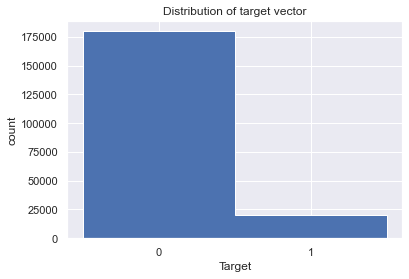

In [15]:
#Distribution of target vector
plt.hist(train_y, bins = 2,histtype = 'stepfilled')
plt.xticks([0.25,0.75],[0,1])
plt.xlabel('Target')
plt.ylabel('count')
plt.title('Distribution of target vector')
print("There are {}% target values with 1".format(100 * train_y.value_counts()[1]/train_y.shape[0]))

- The dataset is imbalanced

# Modelling

In [16]:
#Preprocessing
from sklearn.preprocessing import RobustScaler
from imblearn.over_sampling import BorderlineSMOTE

#Train-test-split
from sklearn.model_selection import train_test_split

#Feature selection
from sklearn.feature_selection import mutual_info_classif, SelectKBest             
from sklearn.feature_selection import RFECV                                        

#Tuning hyperparameters
from sklearn.model_selection import GridSearchCV

#Dimensionality reduction
from sklearn.decomposition import PCA                                                                    

#Applicable models
from sklearn.ensemble import RandomForestClassifier 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression 


#Make pipeline
from imblearn.pipeline import Pipeline

In [17]:
X_train, X_test, y_train, y_test = train_test_split( train_x, train_y, stratify=train_y, random_state=42)

In [18]:
resample = BorderlineSMOTE(random_state=444,k_neighbors=5,
                           m_neighbors=10, kind='borderline-1')
X_resampled, y_resampled = resample.fit_sample(X_train, y_train)
print('Resampled dataset shape %s' % Counter(y_resampled))

Resampled dataset shape Counter({1: 134926, 0: 134926})


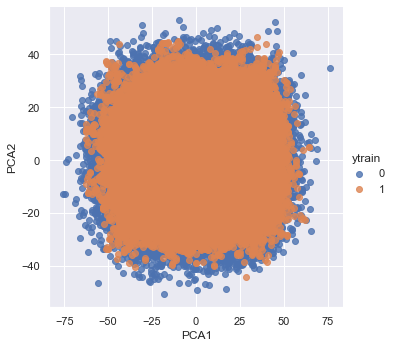

In [19]:
pca = PCA(n_components=2)
X_resampled1 = X_resampled.copy(deep=True)
X = pca.fit_transform(X_resampled1)
X_resampled1['PCA1'] = X[:, 0]
X_resampled1['PCA2'] = X[:, 1]
X_resampled1['ytrain'] = y_resampled
sns.lmplot("PCA1", "PCA2", hue='ytrain', data=X_resampled1, fit_reg=False)

# Model Selection

In [20]:
#Pipelines
#KNN
kbest = SelectKBest(mutual_info_classif, k=20)                   #select features
knc = KNeighborsClassifier()                                       #classifier

kncpipeline = Pipeline([('scaling',RobustScaler()),
                        ('features', kbest),
                        ('model', knc)])                        #pipeline

In [21]:
#LR
lr = LogisticRegression(random_state=42)                            #classifier
rfe = RFECV(estimator=lr, step=10, min_features_to_select=20)       #feature selection

lrpipeline = Pipeline([('scaling',RobustScaler()),
                       ('features',rfe),
                        ('model', lr)])                         #pipeline

In [22]:
#RF
rf = RandomForestClassifier(n_estimators=10, class_weight='balanced', random_state=42)   #classifier
rfecv = RFECV(estimator=rf, 
              step=1, 
              cv=5, 
              scoring = 'roc_auc')                                                       #feature selection

rfpipeline  = Pipeline([('feature_sele',rfecv),
                      ('clf',rf)])                                                #pipeline

In [23]:
knc1 = kncpipeline.fit(X_resampled, y_resampled)

In [24]:
lr1  = lrpipeline.fit(X_resampled, y_resampled)

In [25]:
rf1  = rfpipeline.fit(X_resampled, y_resampled)

In [26]:
 # predict on new data
y_knc1 = knc1.predict(X_test)     

In [27]:
y_lr1 = lr1.predict(X_test)     

In [28]:
y_rf1 = rf1.predict(X_test)     

# Validation

In [29]:
print(knc1.score(X_test, y_test))

0.48792


In [30]:
print(lr1.score(X_test, y_test))

0.72154


In [31]:
print(rf1.score(X_test, y_test))

0.86012


In [32]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

Text(89.18, 0.5, 'true value')

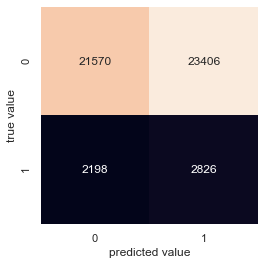

In [33]:
mat = confusion_matrix(y_test, y_knc1)

sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('predicted value')
plt.ylabel('true value')

Text(89.18, 0.5, 'true value')

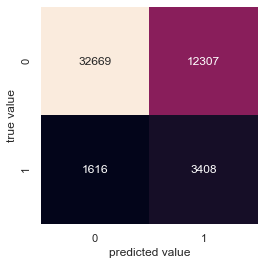

In [34]:
mat1 = confusion_matrix(y_test, y_lr1)
sns.heatmap(mat1, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('predicted value')
plt.ylabel('true value')

Text(89.18, 0.5, 'true value')

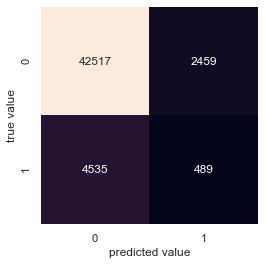

In [35]:
mat2 = confusion_matrix(y_test, y_rf1)

sns.heatmap(mat2, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('predicted value')
plt.ylabel('true value')

In [36]:
target_names = ['class 0', 'class 1']
print(classification_report(y_test, y_knc1, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.91      0.48      0.63     44976
     class 1       0.11      0.56      0.18      5024

    accuracy                           0.49     50000
   macro avg       0.51      0.52      0.40     50000
weighted avg       0.83      0.49      0.58     50000



In [37]:
print(classification_report(y_test, y_lr1, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.95      0.73      0.82     44976
     class 1       0.22      0.68      0.33      5024

    accuracy                           0.72     50000
   macro avg       0.58      0.70      0.58     50000
weighted avg       0.88      0.72      0.77     50000



In [38]:
print(classification_report(y_test, y_rf1, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.90      0.95      0.92     44976
     class 1       0.17      0.10      0.12      5024

    accuracy                           0.86     50000
   macro avg       0.53      0.52      0.52     50000
weighted avg       0.83      0.86      0.84     50000



- Precision — Percent of correct predictions
- Recall — Percent of the positive cases
- F1 score — Percent of correct positive predictions


In [39]:
from sklearn.metrics import balanced_accuracy_score

In [40]:
print(balanced_accuracy_score(y_test, y_knc1))

0.5210445570971185


In [41]:
print(balanced_accuracy_score(y_test, y_lr1))

0.7023545607905249


In [42]:
print(balanced_accuracy_score(y_test, y_rf1))

0.5213295994240099


 - Best model: Logistic regression

# Submission file

In [43]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Columns: 201 entries, ID_code to var_199
dtypes: float64(200), object(1)
memory usage: 306.7+ MB


In [44]:
test.describe()

,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,...,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,10.658737,-1.624244,10.707452,6.788214,11.076399,-5.050558,5.415164,16.529143,0.277135,7.569407,...,3.189766,7.458269,1.925944,3.322016,17.996967,-0.133657,2.290899,8.912428,15.869184,-3.246342
std,3.036716,4.040509,2.633888,2.052724,1.616456,7.869293,0.864686,3.424482,3.333375,1.231865,...,4.551239,3.025189,1.479966,3.995599,3.140652,1.429678,5.446346,0.920904,3.008717,10.398589
min,0.188700,-15.043400,2.355200,-0.022400,5.484400,-27.767000,2.216400,5.713700,-9.956000,4.243300,...,-14.093300,-2.407000,-3.340900,-11.413100,9.382800,-4.911900,-13.944200,6.169600,6.584000,-39.457800
25%,8.442975,-4.700125,8.735600,5.230500,9.891075,-11.201400,4.772600,13.933900,-2.303900,6.623800,...,-0.095000,5.166500,0.882975,0.587600,15.634775,-1.160700,-1.948600,8.260075,13.847275,-11.124000
50%,10.513800,-1.590500,10.560700,6.822350,11.099750,-4.834100,5.391600,16.422700,0.372000,7.632000,...,3.162400,7.379000,1.892600,3.428500,17.977600,-0.162000,2.403600,8.892800,15.943400,-2.725950
75%,12.739600,1.343400,12.495025,8.327600,12.253400,0.942575,6.005800,19.094550,2.930025,8.584825,...,6.336475,9.531100,2.956000,6.174200,20.391725,0.837900,6.519800,9.595900,18.045200,4.935400
max,22.323400,9.385100,18.714100,13.142000,16.037100,17.253700,8.302500,28.292800,9.665500,11.003600,...,20.359000,16.716500,8.005000,17.632600,27.947800,4.545400,15.920700,12.275800,26.538400,27.907400


- train and test datasets seem to have similar characteristics

In [45]:
test_X = test.drop('ID_code', axis=1)
display(test_X)

,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,11.0656,7.7798,12.9536,9.4292,11.4327,-2.3805,5.8493,18.2675,2.1337,8.8100,...,-2.1556,11.8495,-1.4300,2.4508,13.7112,2.4669,4.3654,10.7200,15.4722,-8.7197
1,8.5304,1.2543,11.3047,5.1858,9.1974,-4.0117,6.0196,18.6316,-4.4131,5.9739,...,10.6165,8.8349,0.9403,10.1282,15.5765,0.4773,-1.4852,9.8714,19.1293,-20.9760
2,5.4827,-10.3581,10.1407,7.0479,10.2628,9.8052,4.8950,20.2537,1.5233,8.3442,...,-0.7484,10.9935,1.9803,2.1800,12.9813,2.1281,-7.1086,7.0618,19.8956,-23.1794
3,8.5374,-1.3222,12.0220,6.5749,8.8458,3.1744,4.9397,20.5660,3.3755,7.4578,...,9.5702,9.0766,1.6580,3.5813,15.1874,3.1656,3.9567,9.2295,13.0168,-4.2108
4,11.7058,-0.1327,14.1295,7.7506,9.1035,-8.5848,6.8595,10.6048,2.9890,7.1437,...,4.2259,9.1723,1.2835,3.3778,19.5542,-0.2860,-5.1612,7.2882,13.9260,-9.1846
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,13.1678,1.0136,10.4333,6.7997,8.5974,-4.1641,4.8579,14.7625,-2.7239,6.9937,...,2.0544,9.6849,4.6734,-1.3660,12.8721,1.2013,-4.6195,9.1568,18.2102,4.8801
199996,9.7171,-9.1462,7.3443,9.1421,12.8936,3.0191,5.6888,18.8862,5.0915,6.3545,...,5.0071,6.6548,1.8197,2.4104,18.9037,-0.9337,2.9995,9.1112,18.1740,-20.7689
199997,11.6360,2.2769,11.2074,7.7649,12.6796,11.3224,5.3883,18.3794,1.6603,5.7341,...,5.1536,2.6498,2.4937,-0.0637,20.0609,-1.1742,-4.1524,9.1933,11.7905,-22.2762
199998,13.5745,-0.5134,13.6584,7.4855,11.2241,-11.3037,4.1959,16.8280,5.3208,8.9032,...,3.4259,8.5012,2.2713,5.7621,17.0056,1.1763,-2.3761,8.1079,8.7735,-0.2122


In [46]:
test_X1 = test_X.iloc[:, 0:20]
vif11 = calc_vif(test_X1)
vif11 = vif11[vif11['VIF']<5]

test_X2 = test_X.iloc[:, 20:40]
vif12 = calc_vif(test_X2)
vif12 = vif12[vif12['VIF']<5]

test_X3 = test_X.iloc[:, 40:60]
vif13 = calc_vif(test_X3)
vif13 = vif13[vif13['VIF']<5]

test_X4 = test_X.iloc[:, 60:80]
vif14 = calc_vif(test_X4)
vif14 = vif14[vif14['VIF']<5]

test_X5 = test_X.iloc[:, 80:100]
vif15 = calc_vif(test_X5)
vif15 = vif15[vif15['VIF']<5]

test_X6 = test_X.iloc[:, 100:120]
vif16 = calc_vif(test_X6)
vif16 = vif16[vif16['VIF']<5]

test_X7 = test_X.iloc[:, 120:140]
vif17 = calc_vif(test_X7)
vif17 = vif17[vif17['VIF']<5]

test_X8 = test_X.iloc[:, 140:160]
vif18 = calc_vif(test_X8)
vif18 = vif18[vif18['VIF']<5]

test_X9 = test_X.iloc[:, 160:180]
vif19 = calc_vif(test_X9)
vif19 = vif19[vif19['VIF']<5]

test_X10 = test_X.iloc[:, 180:200]
vif20 = calc_vif(test_X10)
vif20 = vif20[vif20['VIF']<5]

vif = pd.concat([vif11,vif12,vif13,vif14,vif15,vif16,vif17,vif18,vif19,vif20])
vif = vif.T
vif.columns = vif.iloc[0]
vif

variables,var_1,var_5,var_8,var_10,var_11,var_13,var_17,var_18,var_19,var_22,...,var_184,var_185,var_187,var_189,var_190,var_192,var_193,var_195,var_196,var_199
variables,var_1,var_5,var_8,var_10,var_11,var_13,var_17,var_18,var_19,var_22,...,var_184,var_185,var_187,var_189,var_190,var_192,var_193,var_195,var_196,var_199
VIF,1.16177,1.41193,1.00701,1.00464,1.3007,4.40443,1.71481,4.78199,3.42982,3.28299,...,2.84189,1.69986,1.78635,1.5962,1.48834,2.67602,1.68663,1.00878,1.17636,1.09716


In [47]:
test_X = test_X[test_X.columns.intersection(vif.columns)]
test_X.shape

(200000, 97)

In [48]:
test_y =  lr1.predict(test_X)

In [49]:
test_X['ID_code'] = test['ID_code']
test_X['target'] = test_y
test_X.head()

,var_1,var_5,var_8,var_10,var_11,var_13,var_17,var_18,var_19,var_22,...,var_187,var_189,var_190,var_192,var_193,var_195,var_196,var_199,ID_code,target
0,7.7798,-2.3805,2.1337,-2.0248,-4.3554,0.3458,-19.0919,15.5806,16.1763,1.5899,...,-23.5705,1.6591,-2.1556,-1.4300,2.4508,2.4669,4.3654,-8.7197,test_0,1
1,1.2543,-4.0117,-4.4131,-1.3809,-0.3310,2.5667,4.6564,29.1609,0.0910,5.2578,...,-8.7112,0.9812,10.6165,0.9403,10.1282,0.4773,-1.4852,-20.9760,test_1,1
2,-10.3581,9.8052,1.5233,-4.7057,-3.0422,3.8183,2.6541,21.2181,20.8163,4.7473,...,-2.0720,1.1821,-0.7484,1.9803,2.1800,2.1281,-7.1086,-23.1794,test_2,1
3,-1.3222,3.1744,3.3755,0.0095,-5.0659,13.5010,-15.3508,2.1273,21.4797,2.9707,...,-19.7819,1.3104,9.5702,1.6580,3.5813,3.1656,3.9567,-4.2108,test_3,1
4,-0.1327,-8.5848,2.9890,5.1025,-3.2827,8.9672,3.1480,18.0126,13.8006,6.7954,...,-24.8254,1.6321,4.2259,1.2835,3.3778,-0.2860,-5.1612,-9.1846,test_4,0


In [51]:
submission_file = test_X[['ID_code', 'target']]
submission_file.head()

,ID_code,target
0,test_0,1
1,test_1,1
2,test_2,1
3,test_3,1
4,test_4,0


In [52]:
submission_file.to_csv('Santander submission.csv', index=False)